# <div style="text-align: center"><font color='gray' textalign='center'>Lab 3: Classification</font></div>

In [1]:
import pandas as pd
import ds_functions as ds
import matplotlib.pyplot as plt

data = pd.read_csv('heart_failure_clinical_records_dataset.csv', sep = ',')
#data = data.sample(frac=1) #to randomize the dataset order

data["sex"] = data["sex"].astype("bool")
data["anaemia"] = data["anaemia"].astype("bool")
data["diabetes"] = data["diabetes"].astype("bool")
data["high_blood_pressure"] = data["high_blood_pressure"].astype("bool")
data["smoking"] = data["smoking"].astype("bool")
data["DEATH_EVENT"] = data["DEATH_EVENT"].astype("bool")

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 4 * IQR)) |(data > (Q3 + 4 * IQR))).any(axis=1)]
data


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,False,582,False,20,True,265000.0,1.9,130,True,False,4,True
2,65.0,False,146,False,20,False,162000.0,1.3,129,True,True,7,True
3,50.0,True,111,False,20,False,210000.0,1.9,137,True,False,7,True
4,65.0,True,160,True,20,False,327000.0,2.7,116,False,False,8,True
5,90.0,True,47,False,40,True,204000.0,2.1,132,True,True,8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,63.0,True,103,True,35,False,179000.0,0.9,136,True,True,270,False
294,62.0,False,61,True,38,True,155000.0,1.1,143,True,True,270,False
295,55.0,False,1820,False,38,False,270000.0,1.2,139,False,False,271,False
297,45.0,False,2413,False,38,False,140000.0,1.4,140,True,True,280,False


# <font color='gray'> Scaling </font>

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df_nr = data.select_dtypes(include='number')
df_sb = data.select_dtypes(include=['category', 'bool'])

transf = StandardScaler(with_mean=True, with_std=True, copy=True).fit(df_nr)
df_nr = pd.DataFrame(transf.transform(df_nr), columns= df_nr.columns)
norm_data_zscore = df_nr.join(df_sb, how='right')
norm_data_zscore.describe(include='all')

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,274,274,274,274,274,274
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,True,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153,158,177,174,187,189
mean,0.019242,0.011157,0.007549,0.020715,-0.025045,0.020983,0.032457,NaN,NaN,NaN,NaN,NaN,NaN
std,1.011180,1.017389,1.018166,1.007837,0.978021,1.009822,0.998909,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.770075,-0.863853,-2.039844,-2.663033,-1.308200,-5.368987,-1.665247,NaN,NaN,NaN,NaN,NaN,NaN
25%,-0.838739,-0.668703,-0.688987,-0.510447,-0.678941,-0.601525,-0.707146,NaN,NaN,NaN,NaN,NaN,NaN
50%,-0.076736,-0.394008,-0.013558,0.034158,-0.259435,0.079541,-0.146624,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.769933,0.321895,0.577442,0.494244,0.160071,0.760606,0.954866,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df_nr)
df_nr = pd.DataFrame(transf.transform(df_nr), columns= df_nr.columns)
norm_data_minmax = df_nr.join(df_sb, how='right')
norm_data_minmax.describe(include='all')

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,274,274,274,274,274,274
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,True,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153,158,177,174,187,189
mean,0.384247,0.170528,0.367424,0.397836,0.235287,0.678345,0.463481,NaN,NaN,NaN,NaN,NaN,NaN
std,0.217146,0.198276,0.182720,0.149401,0.179336,0.127089,0.272707,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.200000,0.038032,0.242424,0.319097,0.115385,0.600000,0.261566,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.363636,0.091567,0.363636,0.399829,0.192308,0.685714,0.414591,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.545455,0.231087,0.469697,0.468032,0.269231,0.771429,0.715302,NaN,NaN,NaN,NaN,NaN,NaN


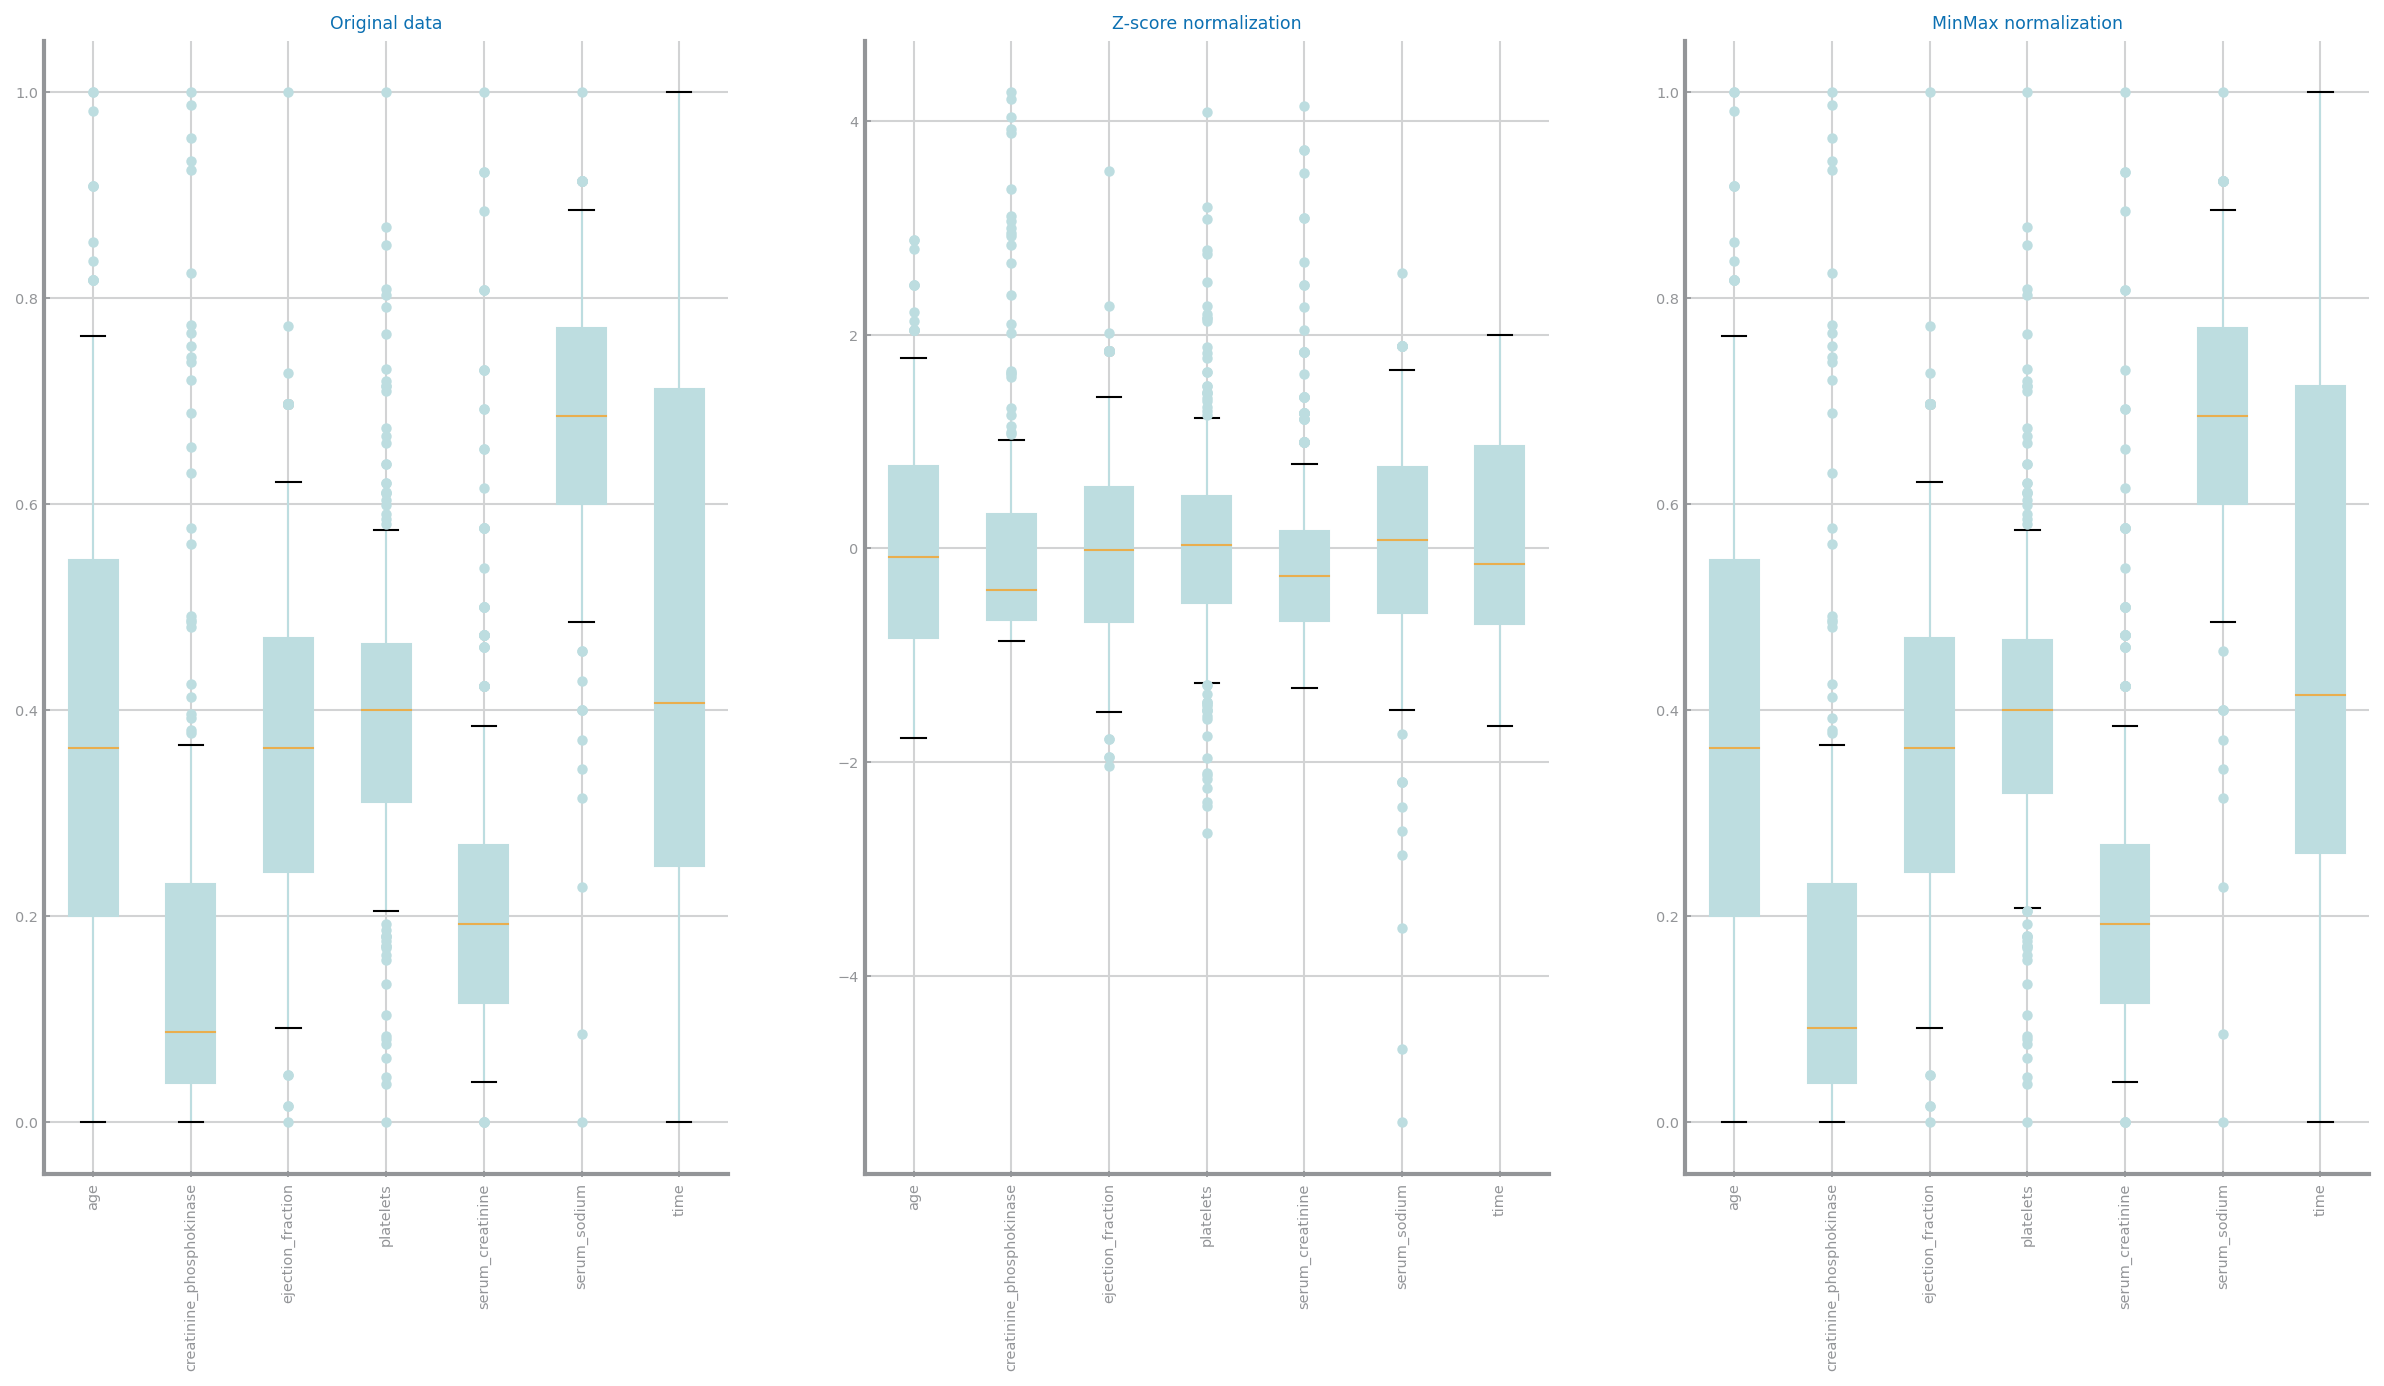

In [4]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(20,10),squeeze=False)
axs[0, 0].set_title('Original data')
df_nr.select_dtypes(exclude=['category', 'bool']).boxplot(ax=axs[0, 0], rot = 90)
axs[0, 1].set_title('Z-score normalization')
norm_data_zscore.select_dtypes(exclude=['category', 'bool']).boxplot(ax=axs[0, 1], rot = 90)
axs[0, 2].set_title('MinMax normalization')
norm_data_minmax.select_dtypes(exclude=['category', 'bool']).boxplot(ax=axs[0, 2], rot = 90)
#fig.tight_layout()
plt.show()



# <font color='gray'> Training Models </font>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.model_selection import train_test_split

target = 'DEATH_EVENT'
positive = True
negative = False
values = {'Original': [len(data[data[target] == positive]), len(data[data[target] == negative])]}

y: np.ndarray = data.pop('DEATH_EVENT').values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)
labels.sort()

In [6]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=3) # 3 folds to keep the 70 / 30 ratio on train and test on each fold

# <font color='gray'> Evaluation</font>

In [7]:
from sklearn.naive_bayes import GaussianNB

y_hat_all = []
score_all = []
models = []
set_idxs = []
for train_index, test_index in kf.split(X, y):
    clf = GaussianNB()
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]
    set_idxs.append([trnX, tstX, trnY, tstY])
    clf = clf.fit(trnX, trnY)
    models.append(clf)
    y_hat = clf.predict(tstX)
    y_hat_all.append(y_hat)
    score_all.append(clf.score(tstX, tstY))
    
best_model_idx = score_all.index(max(score_all))
best_model = models[best_model_idx]
set_idxs = set_idxs[best_model_idx]
print(sum(score_all)/len(score_all))

0.6247412008281574


In [8]:
import numpy as np
import sklearn.metrics as metrics

prdY: np.ndarray = best_model.predict(set_idxs[1])
cnf_mtx: np.ndarray = metrics.confusion_matrix(set_idxs[3], prdY, labels)
cnf_mtx

array([[55,  8],
       [17, 11]], dtype=int64)

<Figure size 600x450 with 0 Axes>

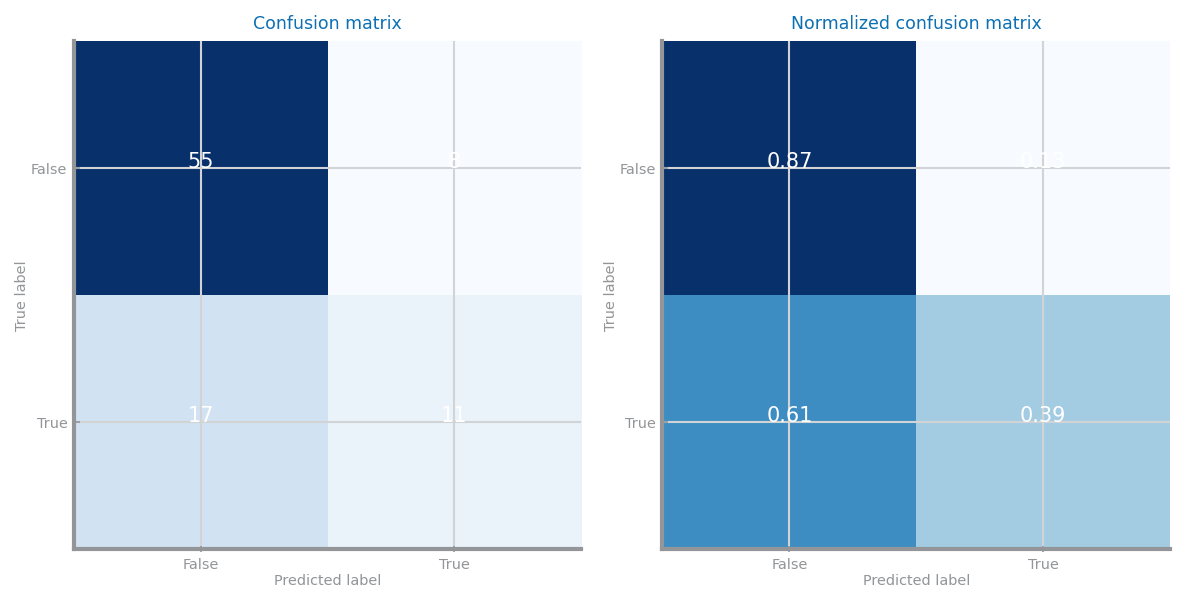

In [9]:
import itertools
import matplotlib.pyplot as plt
CMAP = plt.cm.Blues

def plot_confusion_matrix(cnf_matrix: np.ndarray, classes_names: np.ndarray, ax: plt.Axes = None,
                          normalize: bool = False):
    if ax is None:
        ax = plt.gca()
    if normalize:
        total = cnf_matrix.sum(axis=1)[:, np.newaxis]
        cm = cnf_matrix.astype('float') / total
        title = "Normalized confusion matrix"
    else:
        cm = cnf_matrix
        title = 'Confusion matrix'
    np.set_printoptions(precision=2)
    tick_marks = np.arange(0, len(classes_names), 1)
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes_names)
    ax.set_yticklabels(classes_names)
    ax.imshow(cm, interpolation='nearest', cmap=CMAP)

    fmt = '.2f' if normalize else 'd'
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt), color='w', horizontalalignment="center")

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(8, 4), squeeze=False)
plot_confusion_matrix(cnf_mtx, labels, ax=axs[0,0])
plot_confusion_matrix(metrics.confusion_matrix(set_idxs[3], prdY, labels), labels, axs[0,1], normalize=True)
plt.tight_layout()
plt.show()

# <font color='gray'> Naive Bayes - Original Data</font>

Average accuracy over the folds:  0.6247412008281574 std:  0.12695253189957365


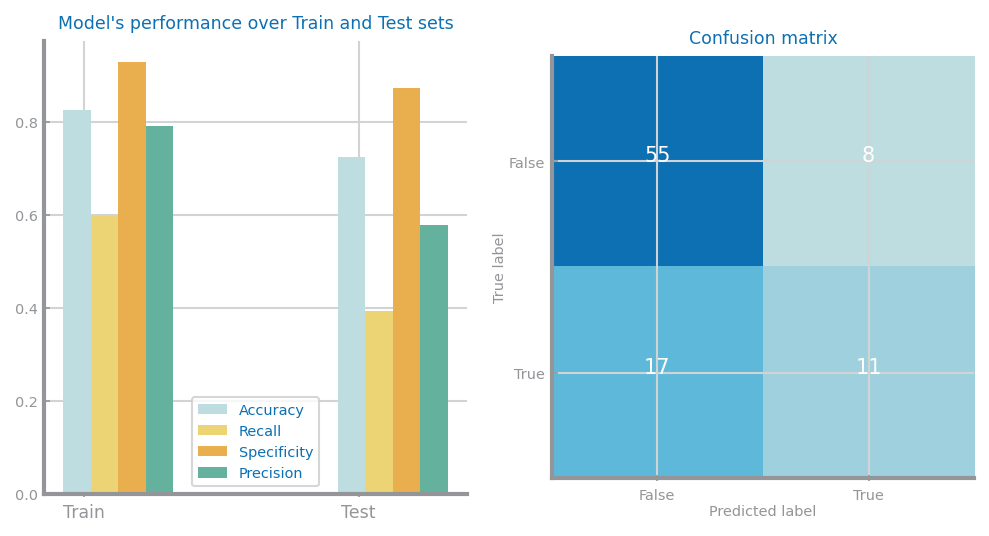

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import ds_functions as ds

y_hat_all = []
score_all = []
models = []
set_idxs = []
for train_index, test_index in kf.split(X, y):
    clf = GaussianNB()
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]
    set_idxs.append([trnX, tstX, trnY, tstY])
    clf = clf.fit(trnX, trnY)
    models.append(clf)
    y_hat = clf.predict(trnX)
    y_hat_all.append(y_hat)
    score_all.append(clf.score(tstX, tstY))

best_model_idx = score_all.index(max(score_all))
best_model = models[best_model_idx]
set_idxs = set_idxs[best_model_idx]
prd_trn = best_model.predict(set_idxs[0])
prd_tst = best_model.predict(set_idxs[1])

print("Average accuracy over the folds: ", sum(score_all)/len(score_all), "std: ", np.std(score_all))

ds.plot_evaluation_results(labels, set_idxs[2], prd_trn, set_idxs[3], prd_tst)

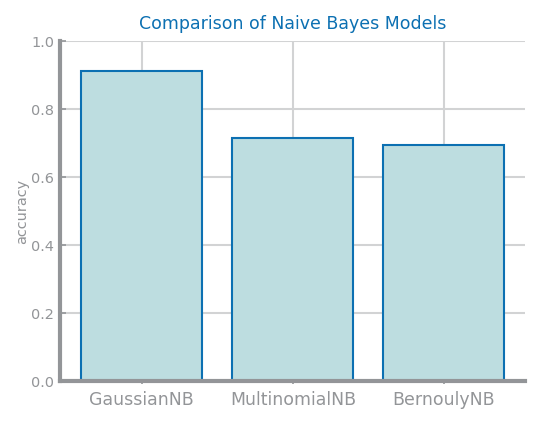

In [11]:
estimators = {'GaussianNB': GaussianNB(),
              'MultinomialNB': MultinomialNB(),
              'BernoulyNB': BernoulliNB()}

xvalues = []
yvalues = []
for clf in estimators:
    y_hat_all = []
    score_all = []
    models = []
    set_idxs = []
    for train_index, test_index in kf.split(X, y):
        model = estimators[clf]
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        set_idxs.append([X_train, X_test, y_train, y_test])
        model = model.fit(X_train, y_train)
        models.append(model)
        y_hat = model.predict(X_test)
        y_hat_all.append(y_hat)
        score_all.append(model.score(X_test, y_test))
    
    best_model_idx = score_all.index(max(score_all))
    best_model = models[best_model_idx]
    set_idxs = set_idxs[best_model_idx]
    xvalues.append(clf)
    prdY = best_model.predict(set_idxs[1])
    yvalues.append(metrics.accuracy_score(set_idxs[3], prdY))

plt.figure()
ds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='accuracy', percentage=True)
plt.show()

# <font color='gray'> KNN - Original Data</font>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
import ds_functions as ds

score_all = []
set_idxs = []
for train_index, test_index in kf.split(X, y):
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]
    set_idxs.append([trnX, tstX, trnY, tstY])
    nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
    dist = ['manhattan', 'euclidean', 'chebyshev']
    values = {}
    train_values = {}
    best = (0, '')
    last_best = 0
    for d in dist:
        yvalues = []
        y_trn_values = []
        for n in nvalues:
            knn = KNeighborsClassifier(n_neighbors=n, metric=d)
            knn.fit(trnX, trnY)
            prdY = knn.predict(tstX)
            prd_trn_Y = knn.predict(trnX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
            y_trn_values.append(metrics.accuracy_score(trnY, prd_trn_Y))
            if yvalues[-1] > last_best:
                best = (n, d)
                last_best = yvalues[-1]
        values[d] = yvalues
        train_values[d] = y_trn_values
    score_all.append(last_best)

print("Average accuracy over the folds: ", sum(score_all)/len(score_all), "std: ", np.std(score_all))
best_model_idx = score_all.index(max(score_all))
set_idxs = set_idxs[best_model_idx]

Average accuracy over the folds:  0.6970855231724796 std:  0.004599308513519272


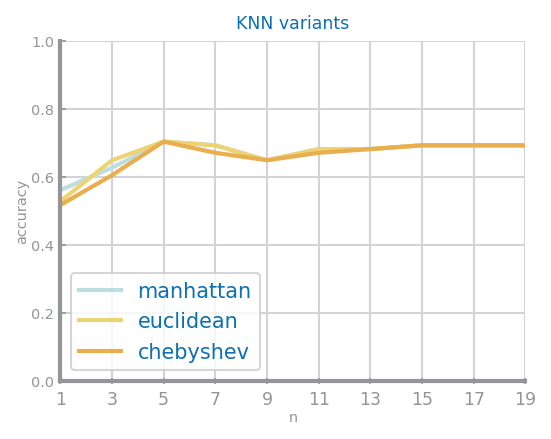

Best results with 5 neighbors and manhattan


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
import ds_functions as ds

trnX, tstX, trnY, tstY = set_idxs
nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
dist = ['manhattan', 'euclidean', 'chebyshev']
values = {}
train_values = {}
best = (0, '')
last_best = 0
for d in dist:
    yvalues = []
    y_trn_values = []
    for n in nvalues:
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(trnX, trnY)
        prdY = knn.predict(tstX)
        prd_trn_Y = knn.predict(trnX)
        yvalues.append(metrics.accuracy_score(tstY, prdY))
        y_trn_values.append(metrics.accuracy_score(trnY, prd_trn_Y))
        if yvalues[-1] > last_best:
            best = (n, d)
            last_best = yvalues[-1]
    values[d] = yvalues
    train_values[d] = y_trn_values

plt.figure()
ds.multiple_line_chart(nvalues, values, title='KNN variants', xlabel='n', ylabel='accuracy', percentage=True)
plt.show()
print('Best results with %d neighbors and %s'%(best[0], best[1]))

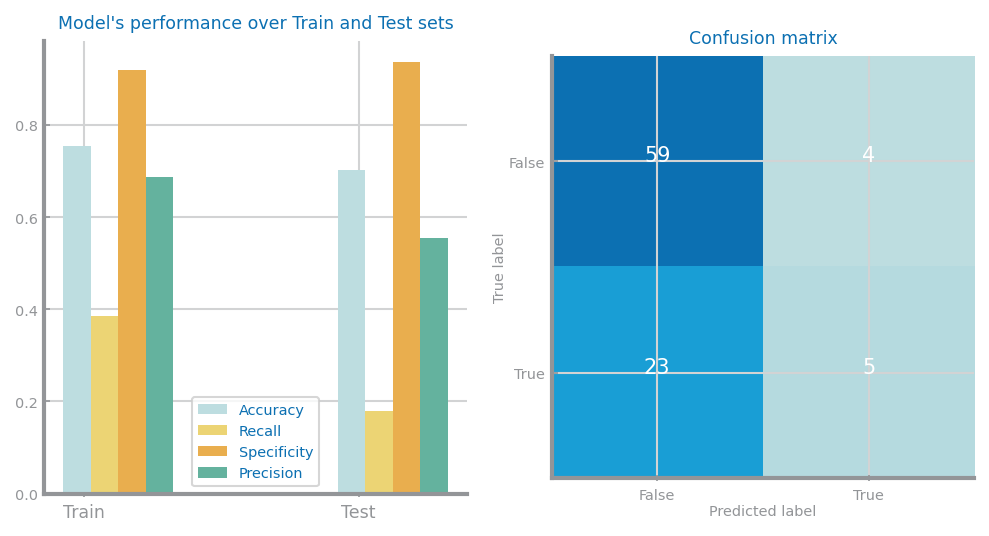

In [14]:
clf = knn = KNeighborsClassifier(n_neighbors=best[0], metric=best[1])
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)

<Figure size 600x450 with 0 Axes>

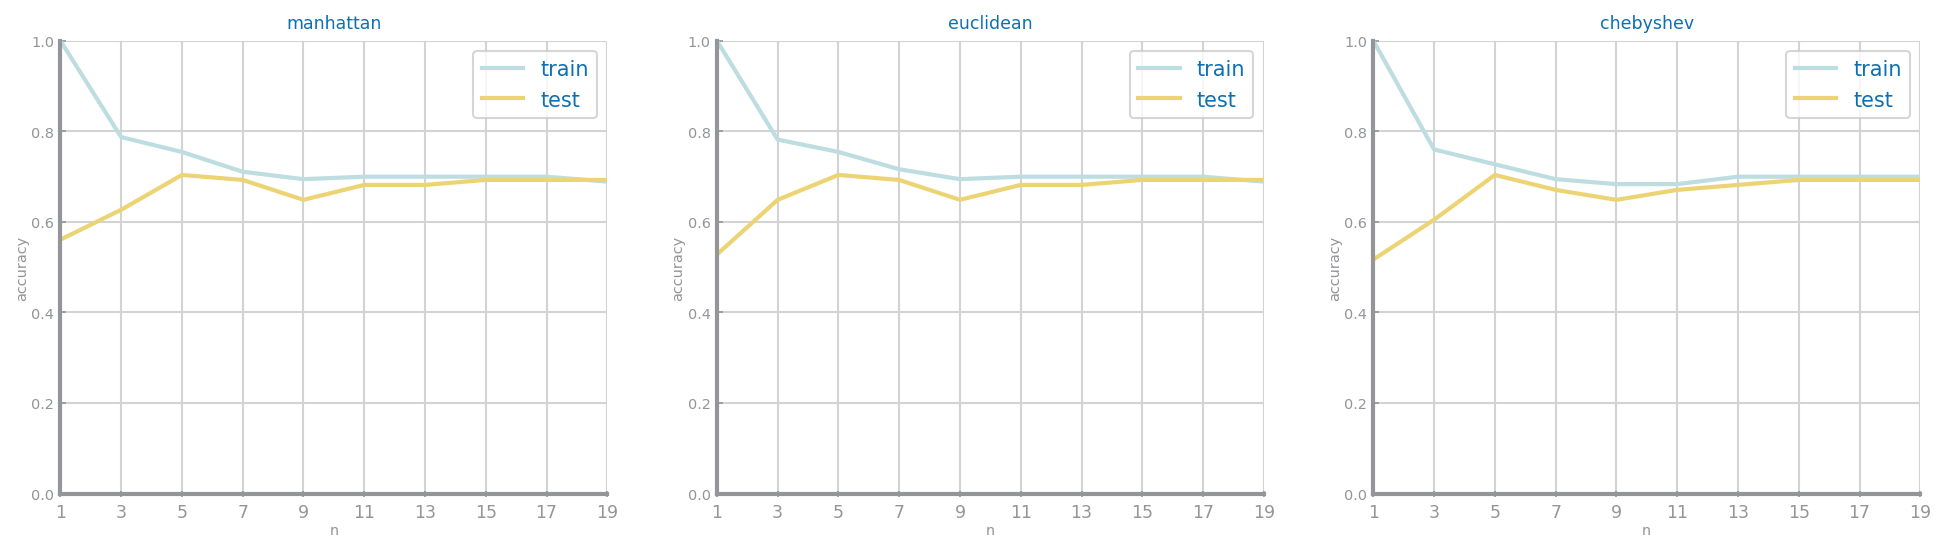

In [15]:
plt.figure()
fig, axs = plt.subplots(1, 3, figsize=(16, 4), squeeze=False)
for i in range(len(dist)):
    ds.multiple_line_chart(nvalues, {'train': train_values[dist[i]], 'test': values[dist[i]]}, ax=axs[0, i], title=dist[i], xlabel='n', ylabel='accuracy', percentage=True)
plt.show()

# <font color='gray'>Decision Trees - Original Data</font>

In [16]:
from sklearn.tree import DecisionTreeClassifier

score_all = []
set_idxs = []

for train_index, test_index in kf.split(X,y):
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]
    set_idxs.append([trnX, tstX, trnY, tstY])
    min_impurity_decrease = [0.025, 0.01, 0.005, 0.0025, 0.001]
    max_depths = [2, 5, 10, 15, 20, 25]
    criteria = ['entropy', 'gini']
    best = ('',  0, 0.0)
    last_best = 0
    best_tree = None

    criteria_test_values = {}
    criteria_train_values = {}

    for k in range(len(criteria)):
        f = criteria[k]
        values = {}
        train_values = {}
        for d in max_depths:
            yvalues = []
            y_trn_values = []
            for imp in min_impurity_decrease:
                tree = DecisionTreeClassifier(min_samples_leaf=1, max_depth=d, criterion=f, min_impurity_decrease=imp)
                tree.fit(trnX, trnY)
                prdY = tree.predict(tstX)
                prd_trn_Y = tree.predict(trnX)
                yvalues.append(metrics.accuracy_score(tstY, prdY))
                y_trn_values.append(metrics.accuracy_score(trnY, prd_trn_Y))
                if yvalues[-1] > last_best:
                    best = (f, d, imp)
                    last_best = yvalues[-1]
                    best_tree = tree

            values[d] = yvalues
            train_values[d] = y_trn_values
        
        criteria_test_values[f] = values
        criteria_train_values[f] = train_values
    score_all.append(last_best)

print("Average accuracy over the folds: ", sum(score_all)/len(score_all), "std: ", np.std(score_all))
best_model_idx = score_all.index(max(score_all))
set_idxs = set_idxs[best_model_idx]

Average accuracy over the folds:  0.624860646599777 std:  0.1530341455213252


<Figure size 600x450 with 0 Axes>

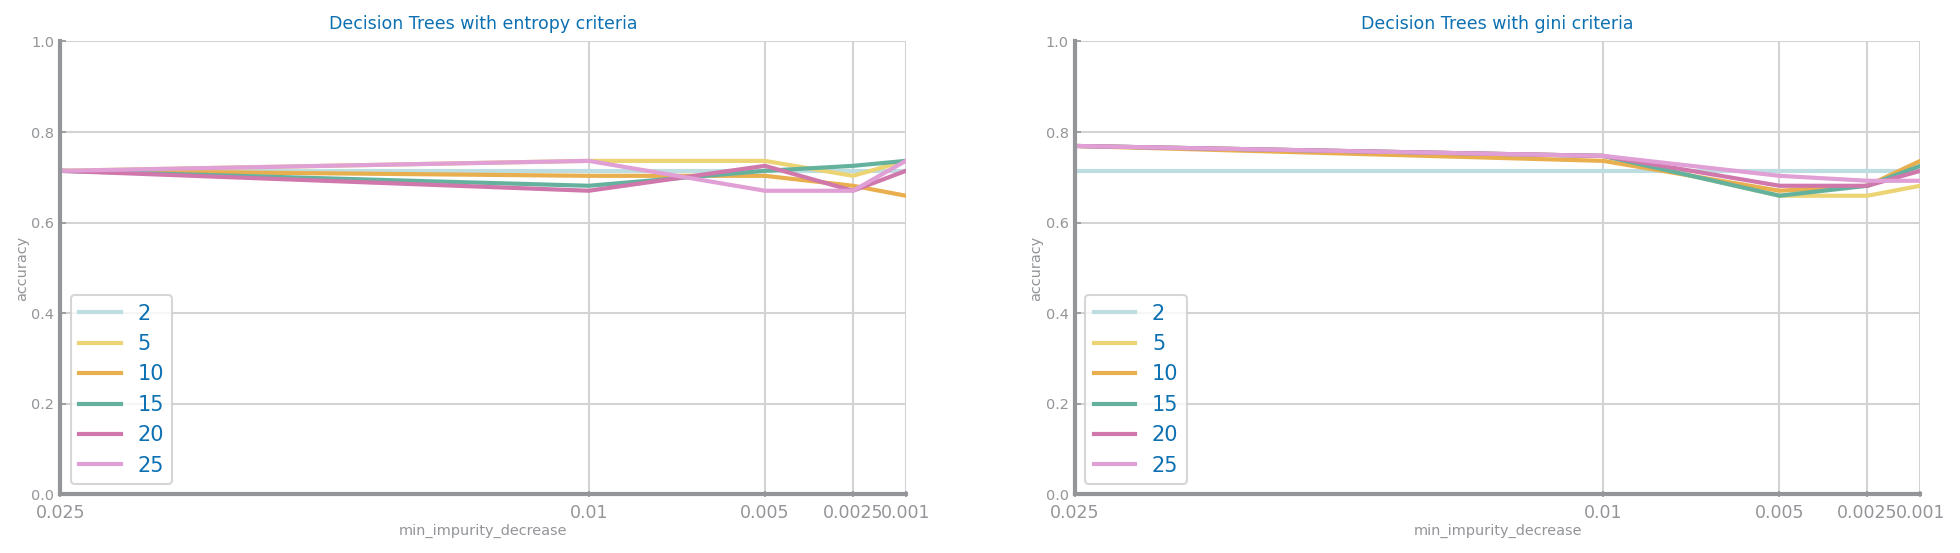

Best results achieved with gini criteria, depth=5 and min_impurity_decrease=0.03 ==> accuracy=0.77


In [17]:
from sklearn.tree import DecisionTreeClassifier

trnX, tstX, trnY, tstY = set_idxs
min_impurity_decrease = [0.025, 0.01, 0.005, 0.0025, 0.001]
max_depths = [2, 5, 10, 15, 20, 25]
criteria = ['entropy', 'gini']
best = ('',  0, 0.0)
last_best = 0
best_tree = None

criteria_test_values = {}
criteria_train_values = {}

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    train_values = {}
    for d in max_depths:
        yvalues = []
        y_trn_values = []
        for imp in min_impurity_decrease:
            tree = DecisionTreeClassifier(min_samples_leaf=1, max_depth=d, criterion=f, min_impurity_decrease=imp)
            tree.fit(trnX, trnY)
            prdY = tree.predict(tstX)
            prd_trn_Y = tree.predict(trnX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
            y_trn_values.append(metrics.accuracy_score(trnY, prd_trn_Y))
            if yvalues[-1] > last_best:
                best = (f, d, imp)
                last_best = yvalues[-1]
                best_tree = tree

        values[d] = yvalues
        train_values[d] = y_trn_values
    ds.multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title='Decision Trees with %s criteria'%f,
                           xlabel='min_impurity_decrease', ylabel='accuracy', percentage=True)
    
    criteria_test_values[f] = values
    criteria_train_values[f] = train_values
    

plt.show()
print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.2f ==> accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

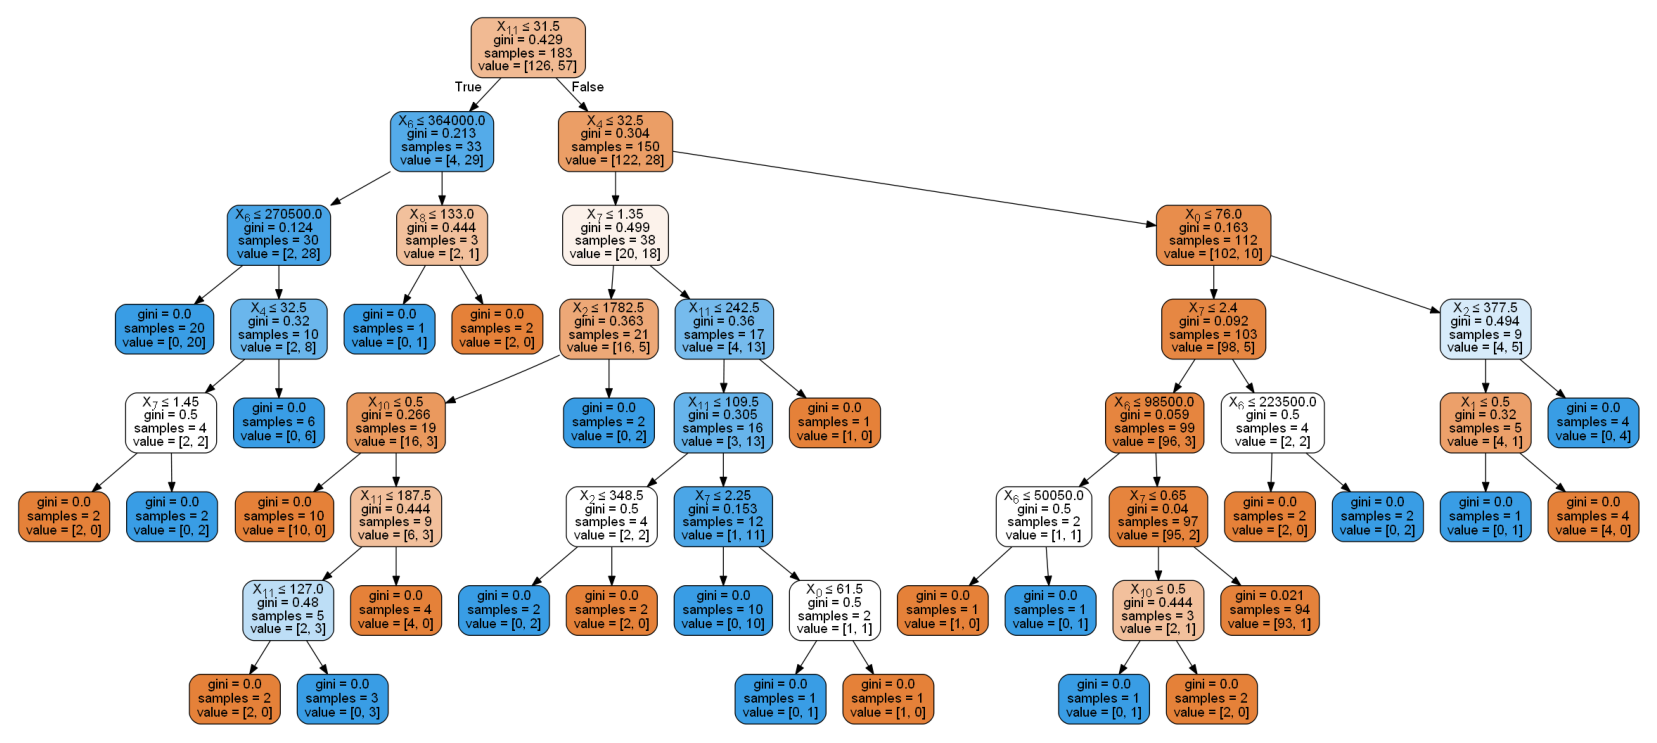

In [18]:
from sklearn.tree import export_graphviz
import pydot

dot_data = export_graphviz(tree, out_file='dtree.dot', filled=True, rounded=True, special_characters=True)
# Convert to png
(graph,) = pydot.graph_from_dot_file('dtree.dot')
graph.write_png('dtree.png')

plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('dtree.png'))
plt.axis('off')
plt.show()

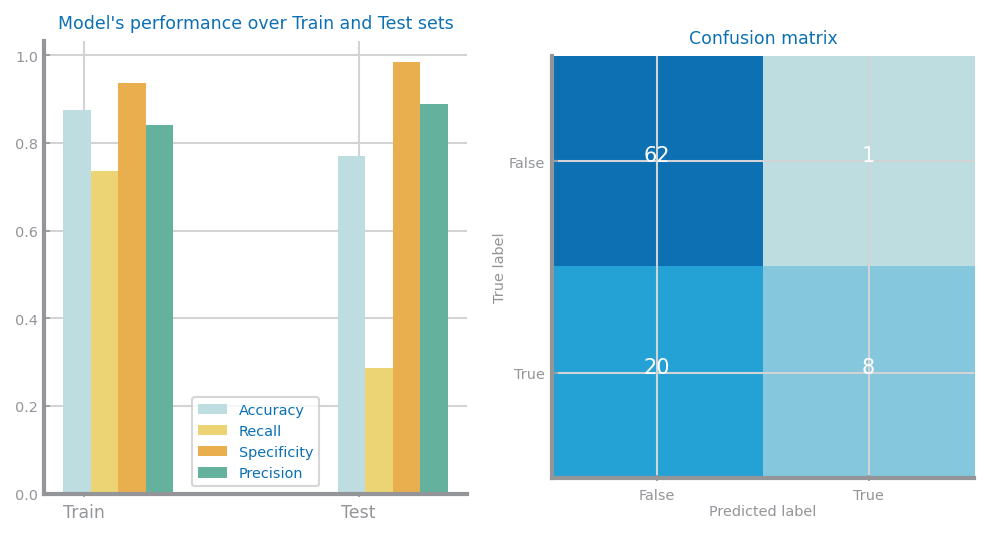

In [19]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)

<Figure size 600x450 with 0 Axes>

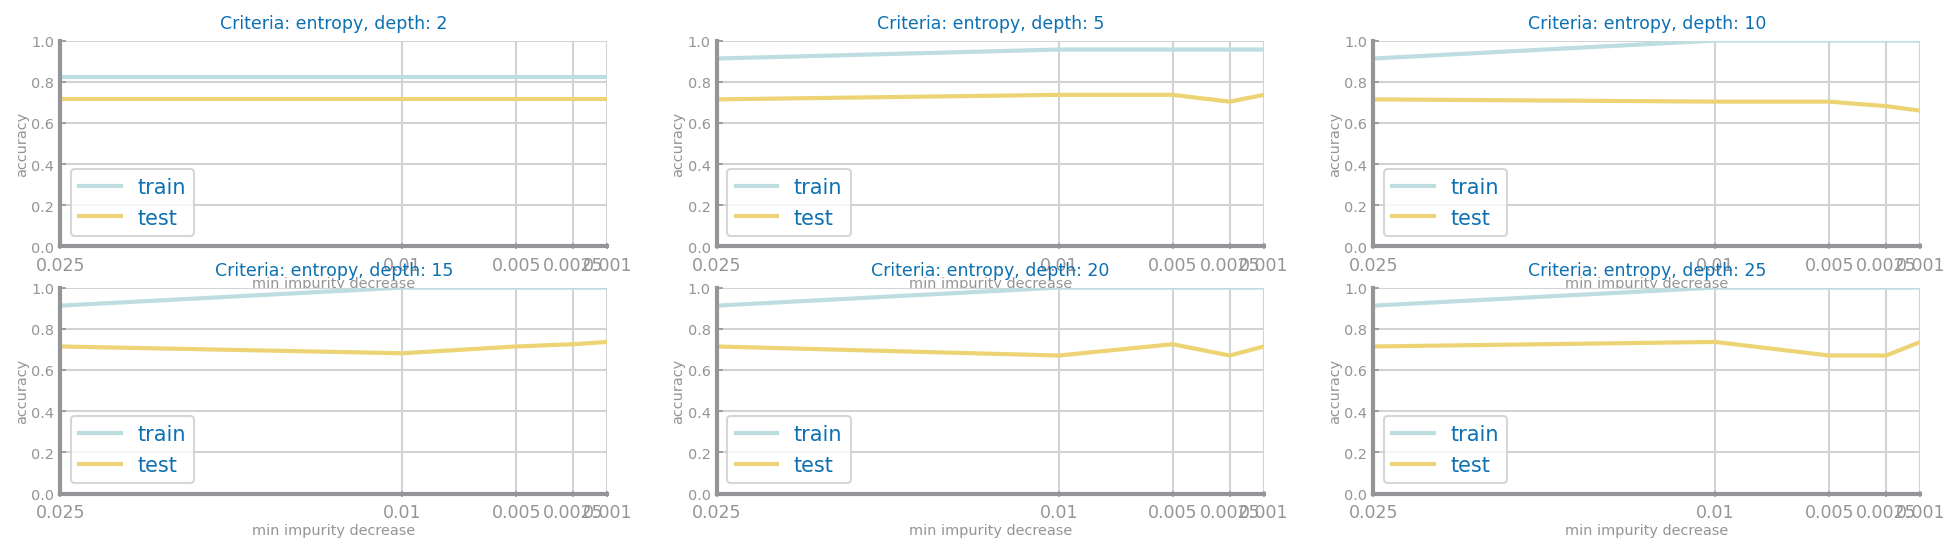

<Figure size 600x450 with 0 Axes>

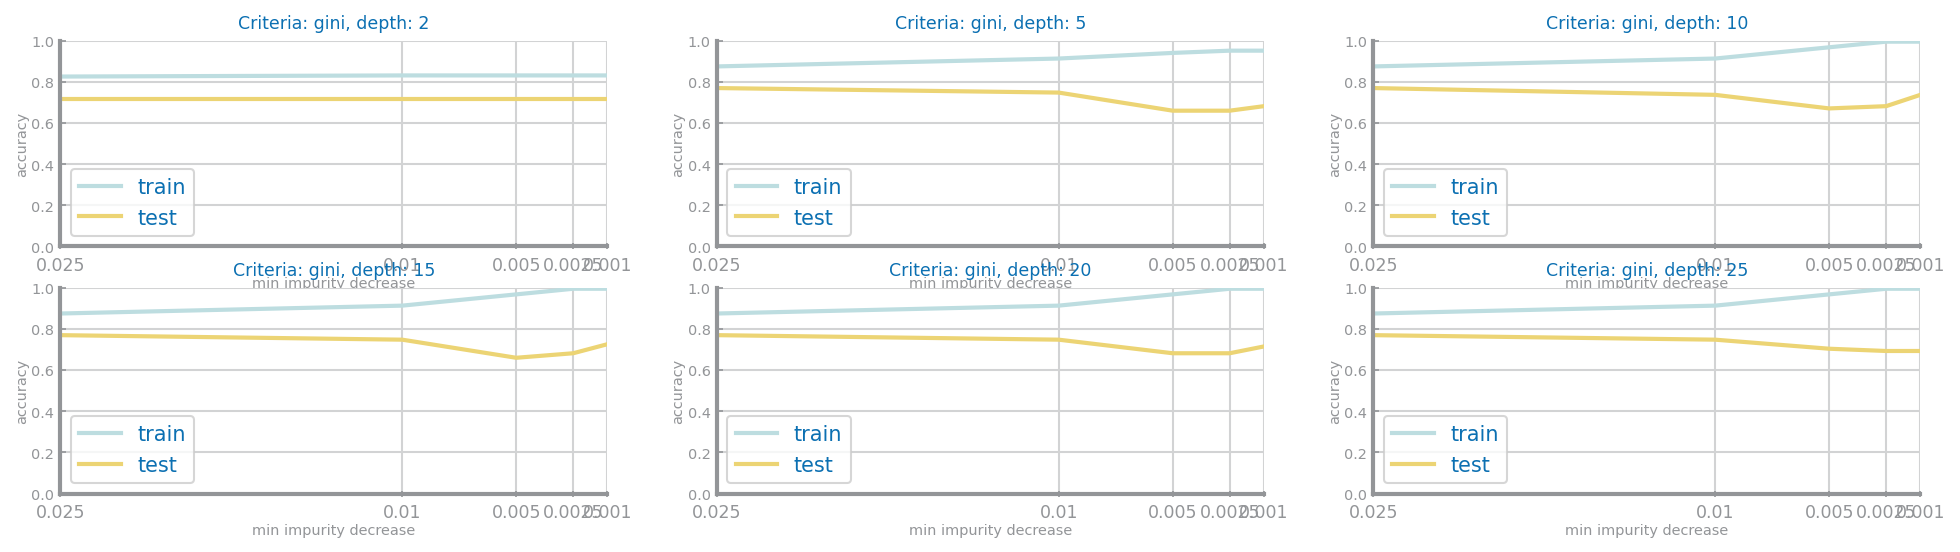

In [20]:
for j in range(len(criteria)):
    train_values = criteria_train_values[criteria[j]]
    test_values = criteria_test_values[criteria[j]]
    plt.figure()
    fig, axs = plt.subplots(2, 3, figsize=(16, 4), squeeze=False)
    for i in range(len(max_depths)):
        ds.multiple_line_chart(min_impurity_decrease, {'train': train_values[max_depths[i]], 'test': test_values[max_depths[i]]}, ax=axs[int(i/3), i%3], title='Criteria: ' + criteria[j]+ ', depth: ' + str(max_depths[i]), xlabel='min impurity decrease', ylabel='accuracy', percentage=True)
    plt.show()

# <font color='gray'>Random Forests - Original Data</font>

In [21]:
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier

score_all = []
set_idxs = []
for train_index, test_index in kf.split(X,y):
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]
    set_idxs.append([trnX, tstX, trnY, tstY])

    n_estimators = [5, 10, 25, 50, 75, 100, 150, 200, 250, 300]
    max_depths = [5, 10, 25]
    max_features = [.1, .3, .5, .7, .9, 1]
    best = ('', 0, 0)
    last_best = 0
    best_tree = None

    max_depth_test_values = {}
    max_depth_train_values = {}

    cols = len(max_depths)
    for k in range(len(max_depths)):
        d = max_depths[k]
        values = {}
        train_values = {}
        for f in max_features:
            yvalues = []
            y_trn_values = []
            for n in n_estimators:
                rf = RandomForestClassifier(n_estimators=n, max_depth=d, max_features=f)
                rf.fit(trnX, trnY)
                prdY = rf.predict(tstX)
                prd_trn_y = rf.predict(trnX)
                yvalues.append(metrics.accuracy_score(tstY, prdY))
                y_trn_values.append(metrics.accuracy_score(trnY, prd_trn_y))
                if yvalues[-1] > last_best:
                    best = (d, f, n)
                    last_best = yvalues[-1]
                    best_tree = rf

            values[f] = yvalues
            train_values[f] = y_trn_values

        max_depth_test_values[max_depths[k]] = values
        max_depth_train_values[max_depths[k]] = train_values

    score_all.append(last_best)

print("Average accuracy over the folds: ", sum(score_all)/len(score_all), "std: ", np.std(score_all))
best_model_idx = score_all.index(max(score_all))
set_idxs = set_idxs[best_model_idx]
    

Average accuracy over the folds:  0.7627806975633064 std:  0.013526409619581521


<Figure size 600x450 with 0 Axes>

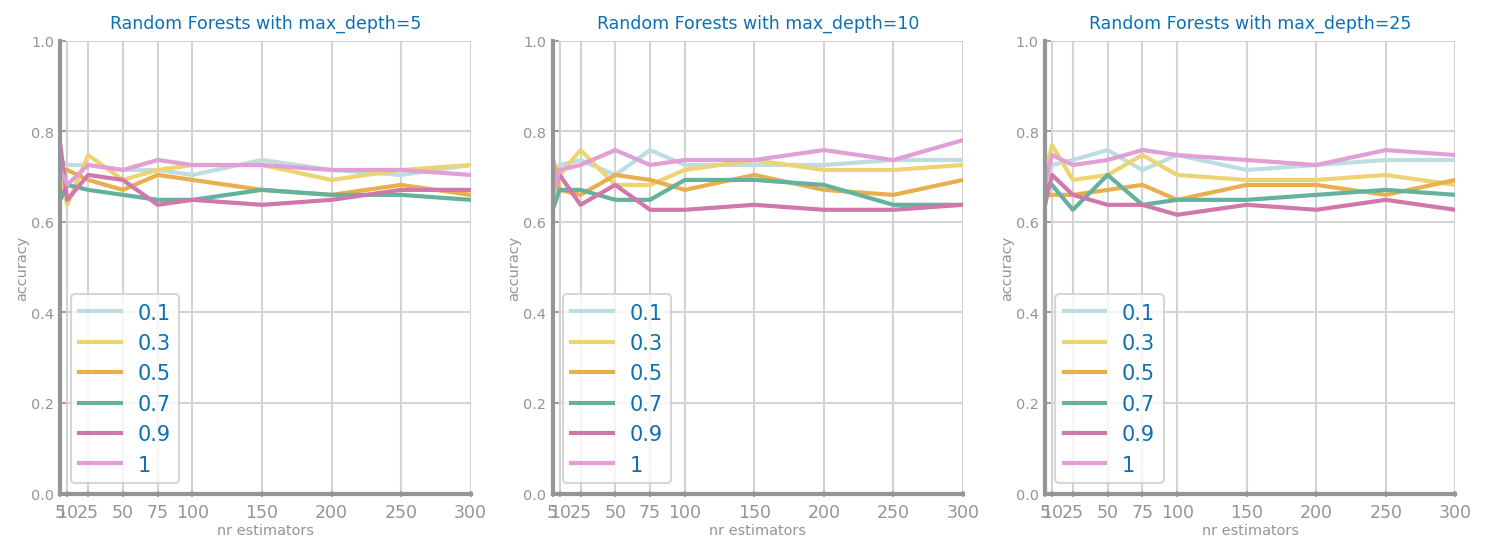

Best results with depth=10, 1.00 features and 300 estimators, with accuracy=0.78


In [22]:
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier

trnX, tstX, trnY, tstY = set_idxs
n_estimators = [5, 10, 25, 50, 75, 100, 150, 200, 250, 300]
max_depths = [5, 10, 25]
max_features = [.1, .3, .5, .7, .9, 1]
best = ('', 0, 0)
last_best = 0
best_tree = None


max_depth_test_values = {}
max_depth_train_values = {}

cols = len(max_depths)
plt.figure()
fig, axs = plt.subplots(1, cols, figsize=(cols*ds.HEIGHT, ds.HEIGHT), squeeze=False)
for k in range(len(max_depths)):
    d = max_depths[k]
    values = {}
    train_values = {}
    for f in max_features:
        yvalues = []
        y_trn_values = []
        for n in n_estimators:
            rf = RandomForestClassifier(n_estimators=n, max_depth=d, max_features=f)
            rf.fit(trnX, trnY)
            prdY = rf.predict(tstX)
            prd_trn_y = rf.predict(trnX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
            y_trn_values.append(metrics.accuracy_score(trnY, prd_trn_y))
            if yvalues[-1] > last_best:
                best = (d, f, n)
                last_best = yvalues[-1]
                best_tree = rf

        values[f] = yvalues
        train_values[f] = y_trn_values
    ds.multiple_line_chart(n_estimators, values, ax=axs[0, k], title='Random Forests with max_depth=%d'%d,
                           xlabel='nr estimators', ylabel='accuracy', percentage=True)
    
    max_depth_test_values[max_depths[k]] = values
    max_depth_train_values[max_depths[k]] = train_values
    
    
plt.show()
print('Best results with depth=%d, %1.2f features and %d estimators, with accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

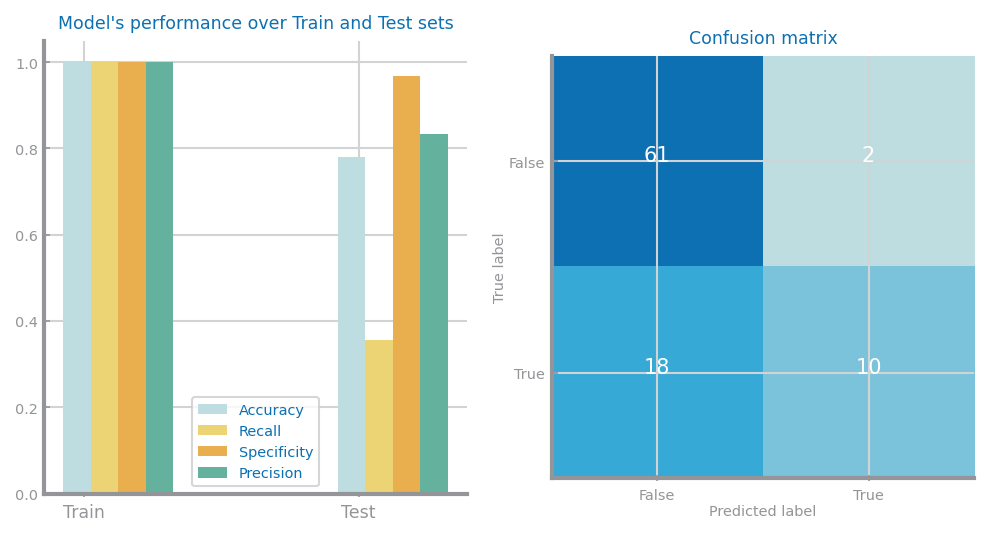

In [23]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)

<Figure size 600x450 with 0 Axes>

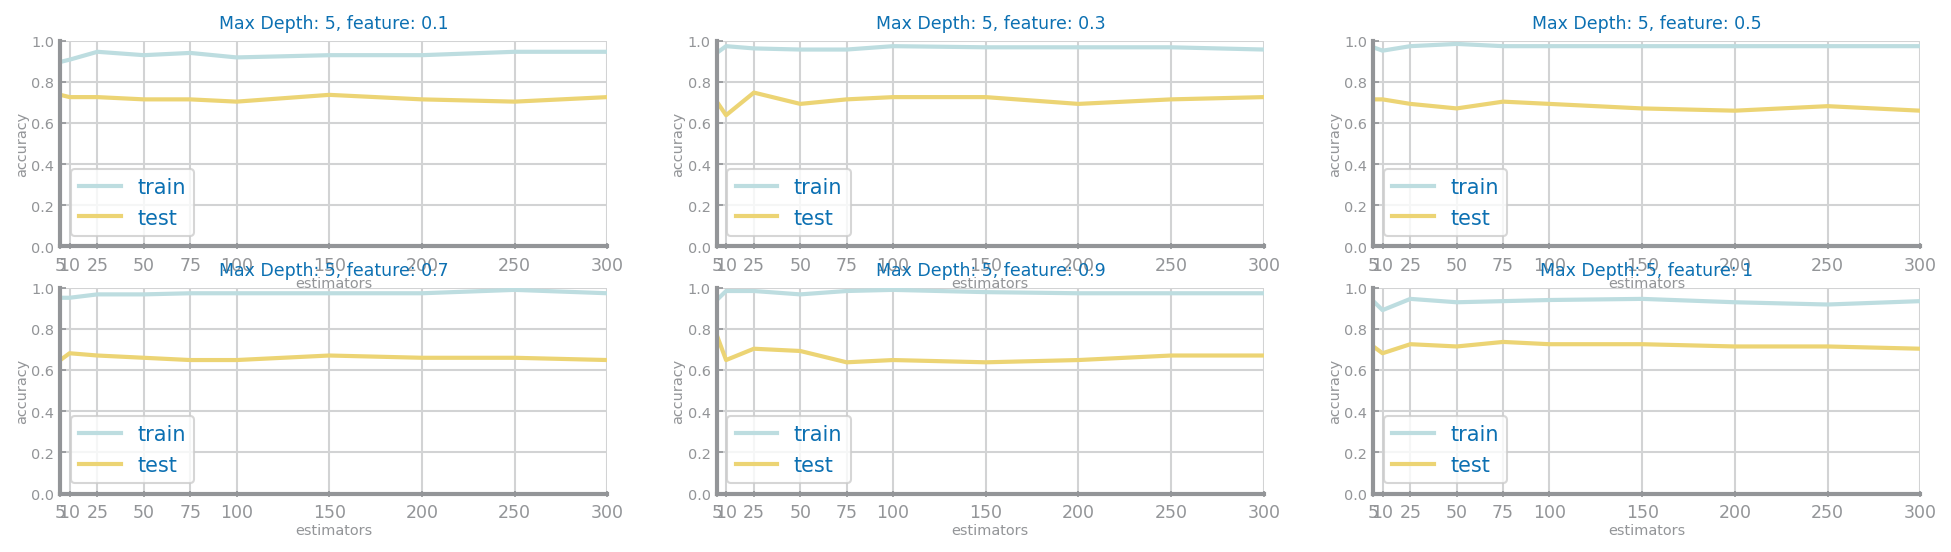

<Figure size 600x450 with 0 Axes>

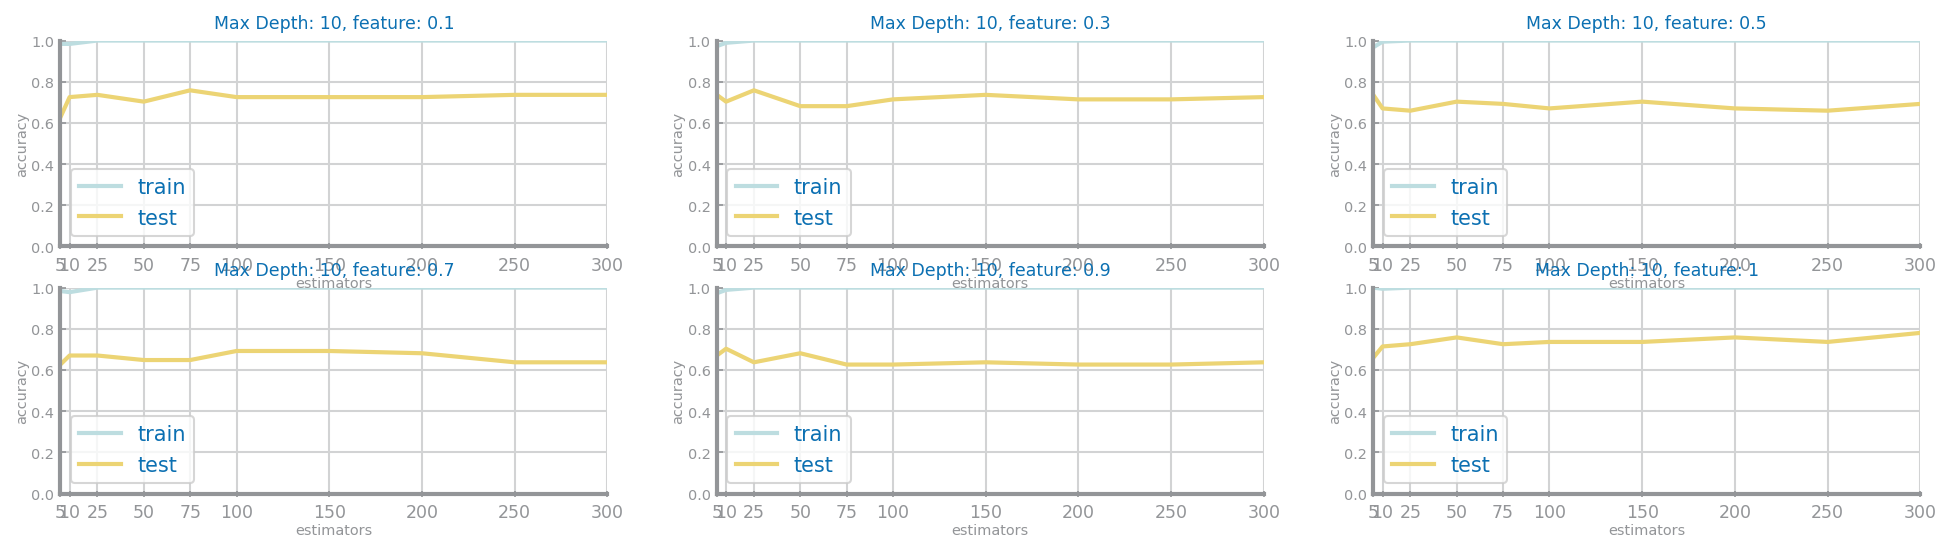

<Figure size 600x450 with 0 Axes>

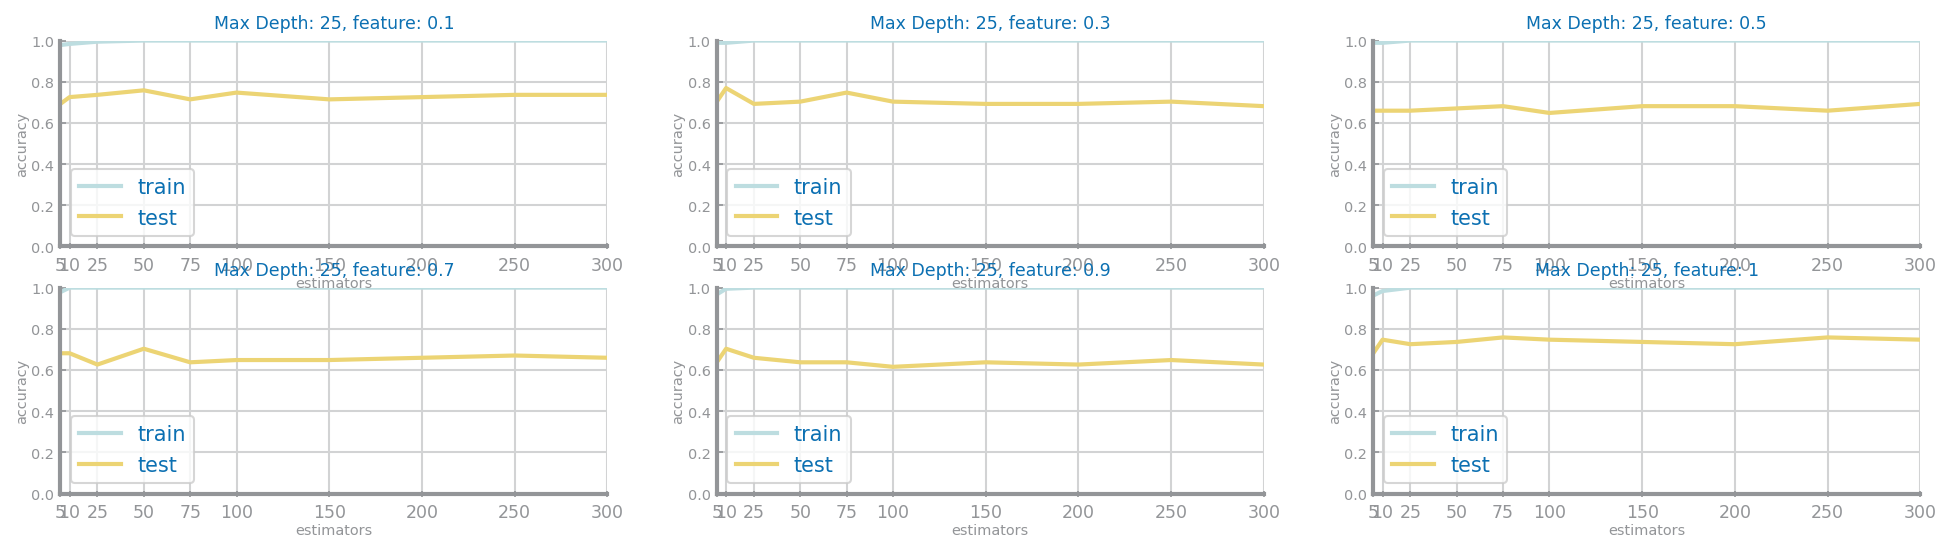

In [24]:
for j in range(len(max_depths)):
    train_values = max_depth_train_values[max_depths[j]]
    test_values = max_depth_test_values[max_depths[j]]
    plt.figure()
    fig, axs = plt.subplots(2, 3, figsize=(16, 4), squeeze=False)
    for i in range(len(max_features)):
        ds.multiple_line_chart(n_estimators, {'train': train_values[max_features[i]], 'test': test_values[max_features[i]]}, ax=axs[int(i/3), i%3], title='Max Depth: ' + str(max_depths[j]) + ', feature: ' + str(max_features[i]), xlabel='estimators', ylabel='accuracy', percentage=True)
    plt.show()

# <font color='gray'>Logistic Regression - Original Data</font>

Average accuracy over the folds:  0.6755852842809364 std:  0.08412329756929092


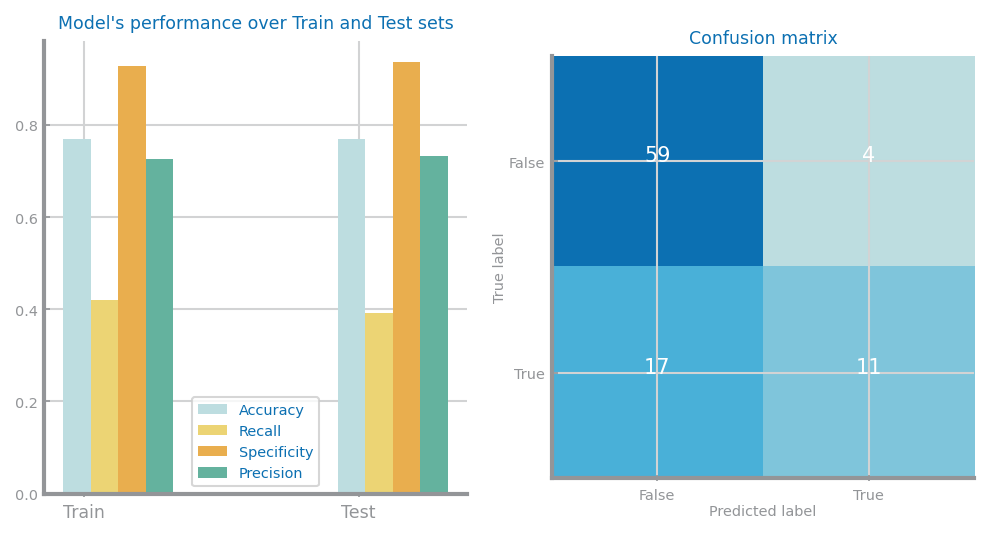

In [25]:
from sklearn.linear_model import LogisticRegression

y_hat_all = []
score_all = []
models = []
set_idxs = []
for train_index, test_index in kf.split(X, y):
    clf = LogisticRegression(random_state = 0)
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]
    set_idxs.append([trnX, tstX, trnY, tstY])
    clf = clf.fit(trnX, trnY)
    models.append(clf)
    y_hat = clf.predict(trnX)
    y_hat_all.append(y_hat)
    score_all.append(clf.score(tstX, tstY))

best_model_idx = score_all.index(max(score_all))
best_model = models[best_model_idx]
set_idxs = set_idxs[best_model_idx]
prd_trn = best_model.predict(set_idxs[0])
prd_tst = best_model.predict(set_idxs[1])

print("Average accuracy over the folds: ", sum(score_all)/len(score_all), "std: ", np.std(score_all))

ds.plot_evaluation_results(labels, set_idxs[2], prd_trn, set_idxs[3], prd_tst)

# <font color='gray'>Gradient Boosting - Original Data</font>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.ensemble import GradientBoostingClassifier
import ds_functions as ds

score_all = []
set_idxs = []
for train_index, test_index in kf.split(X,y):
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]
    set_idxs.append([trnX, tstX, trnY, tstY])
    
    n_estimators = [5, 10, 25, 50, 75, 100, 150, 200, 250, 300]
    max_depths = [5, 10, 25]
    learning_rate = [.1, .3, .5, .7, .9]
    best = ('', 0, 0)
    last_best = 0
    best_tree = None

    cols = len(max_depths)
    for k in range(len(max_depths)):
        d = max_depths[k]
        values = {}
        for lr in learning_rate:
            yvalues = []
            for n in n_estimators:
                gb = GradientBoostingClassifier(n_estimators=n, max_depth=d, learning_rate=lr)
                gb.fit(trnX, trnY)
                prdY = gb.predict(tstX)
                yvalues.append(metrics.accuracy_score(tstY, prdY))
                if yvalues[-1] > last_best:
                    best = (d, lr, n)
                    last_best = yvalues[-1]
                    best_tree = gb
            values[lr] = yvalues
            
    score_all.append(last_best)

print("Average accuracy over the folds: ", sum(score_all)/len(score_all), "std: ", np.std(score_all))
best_model_idx = score_all.index(max(score_all))
set_idxs = set_idxs[best_model_idx]

Average accuracy over the folds:  0.7189042841216754 std:  0.01963889327468052


<Figure size 600x450 with 0 Axes>

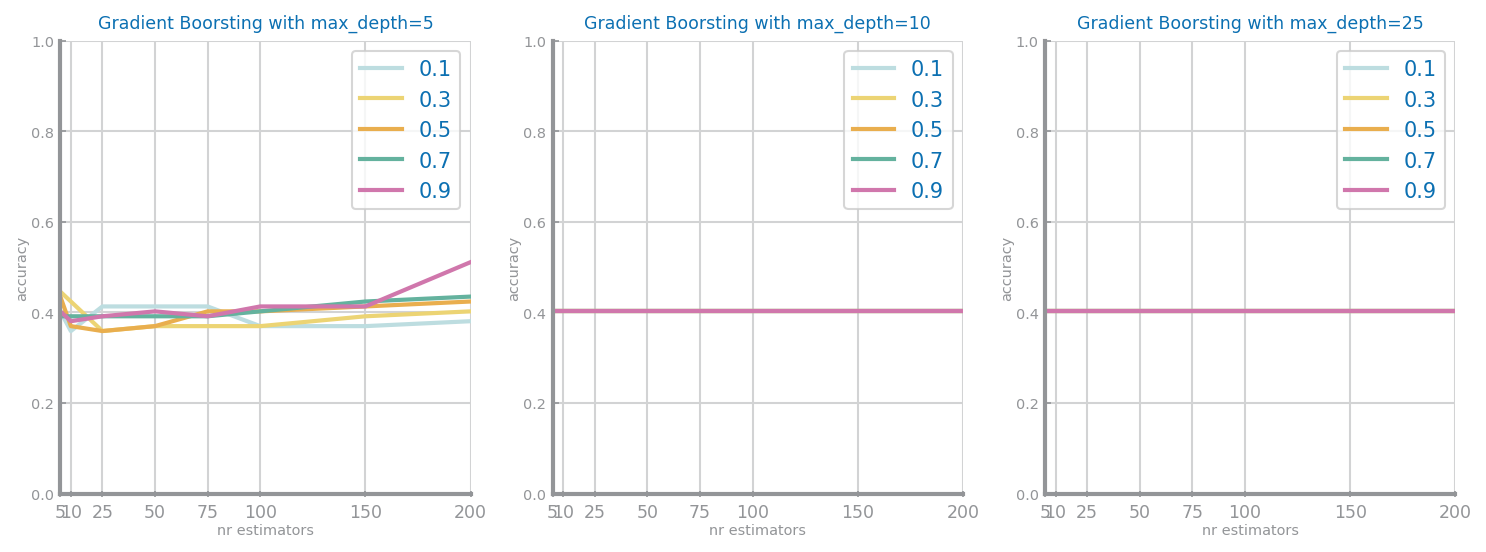

Best results with depth=5, learning rate=0.90 and 200 estimators, with accuracy=0.51


In [27]:
trnX, tstX, trnY, tstY = set_idxs

n_estimators = [5, 10, 25, 50, 75, 100, 150, 200]
max_depths = [5, 10, 25]
learning_rate = [.1, .3, .5, .7, .9]
best = ('', 0, 0)
last_best = 0
best_tree = None

max_depth_test_values = {}
max_depth_train_values = {}

cols = len(max_depths)
plt.figure()
fig, axs = plt.subplots(1, cols, figsize=(cols*ds.HEIGHT, ds.HEIGHT), squeeze=False)
for k in range(len(max_depths)):
    d = max_depths[k]
    values = {}
    train_values = {}
    for lr in learning_rate:
        yvalues = []
        y_trn_values = []
        for n in n_estimators:
            gb = GradientBoostingClassifier(n_estimators=n, max_depth=d, learning_rate=lr)
            gb.fit(trnX, trnY)
            prdY = gb.predict(tstX)
            prd_trn_y = gb.predict(trnX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
            y_trn_values.append(metrics.accuracy_score(trnY, prd_trn_y))
            if yvalues[-1] > last_best:
                best = (d, lr, n)
                last_best = yvalues[-1]
                best_tree = gb
        values[lr] = yvalues
        train_values[lr] = y_trn_values
    ds.multiple_line_chart(n_estimators, values, ax=axs[0, k], title='Gradient Boorsting with max_depth=%d'%d,
                           xlabel='nr estimators', ylabel='accuracy', percentage=True)
    max_depth_test_values[max_depths[k]] = values
    max_depth_train_values[max_depths[k]] = train_values

plt.show()
print('Best results with depth=%d, learning rate=%1.2f and %d estimators, with accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

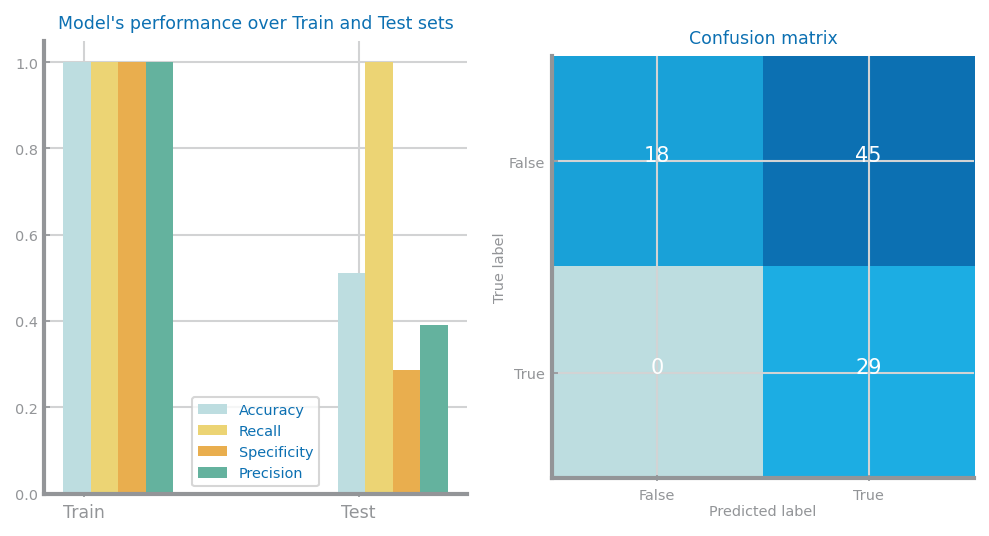

In [28]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)

<Figure size 600x450 with 0 Axes>

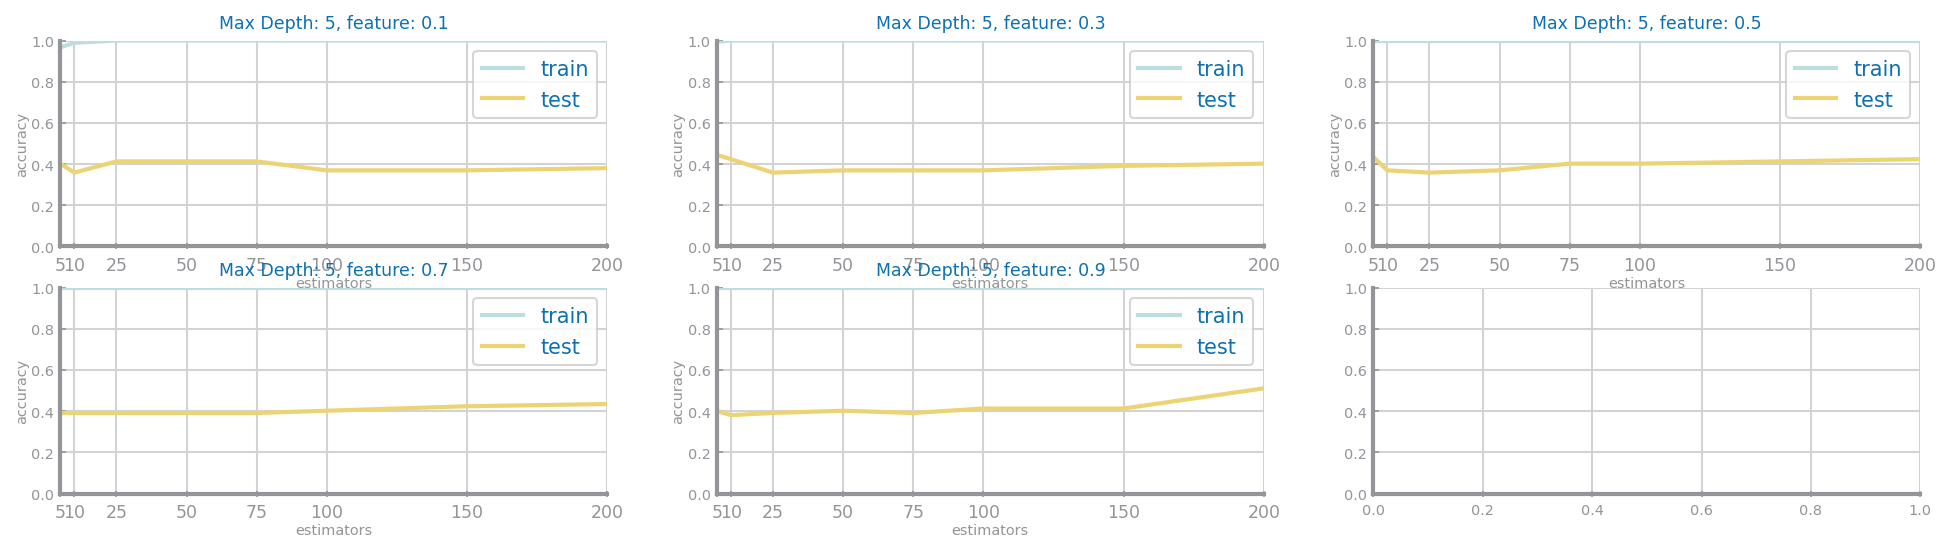

<Figure size 600x450 with 0 Axes>

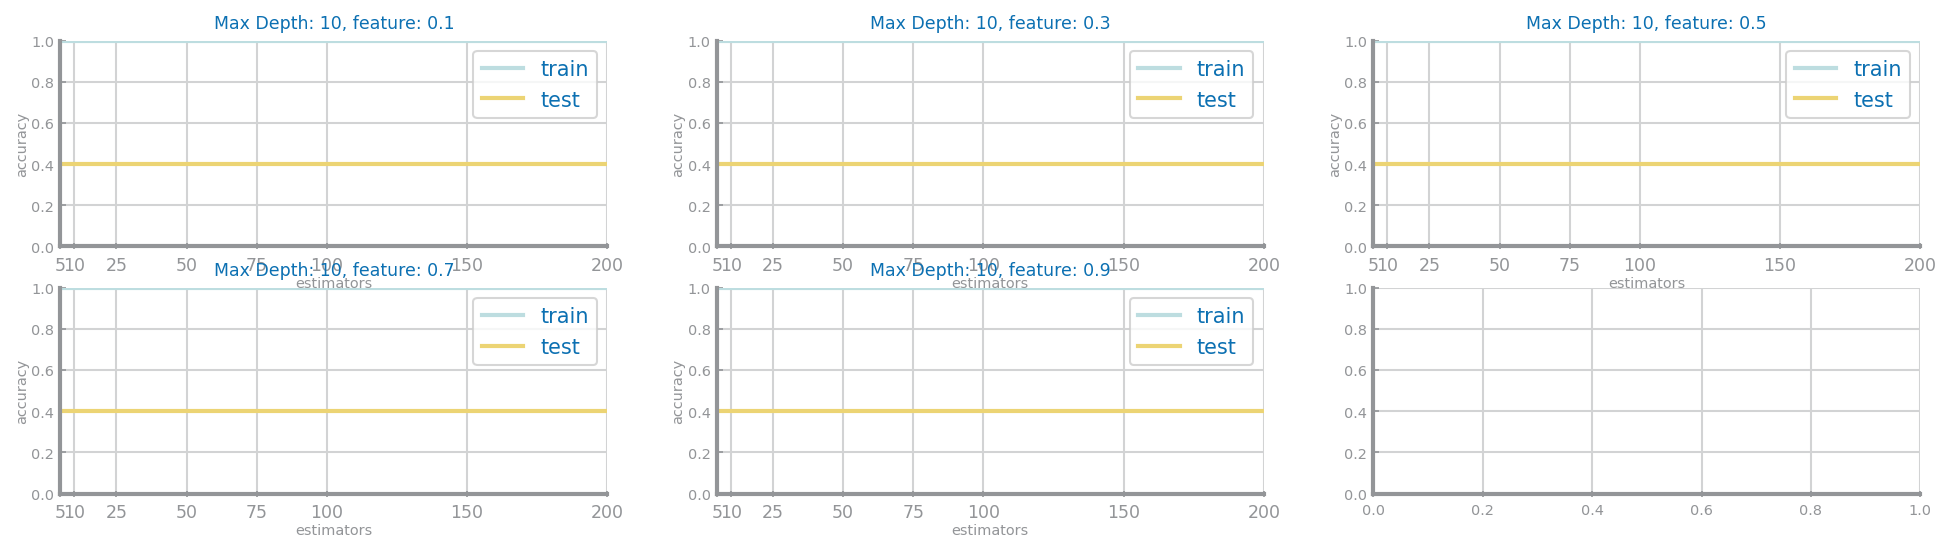

<Figure size 600x450 with 0 Axes>

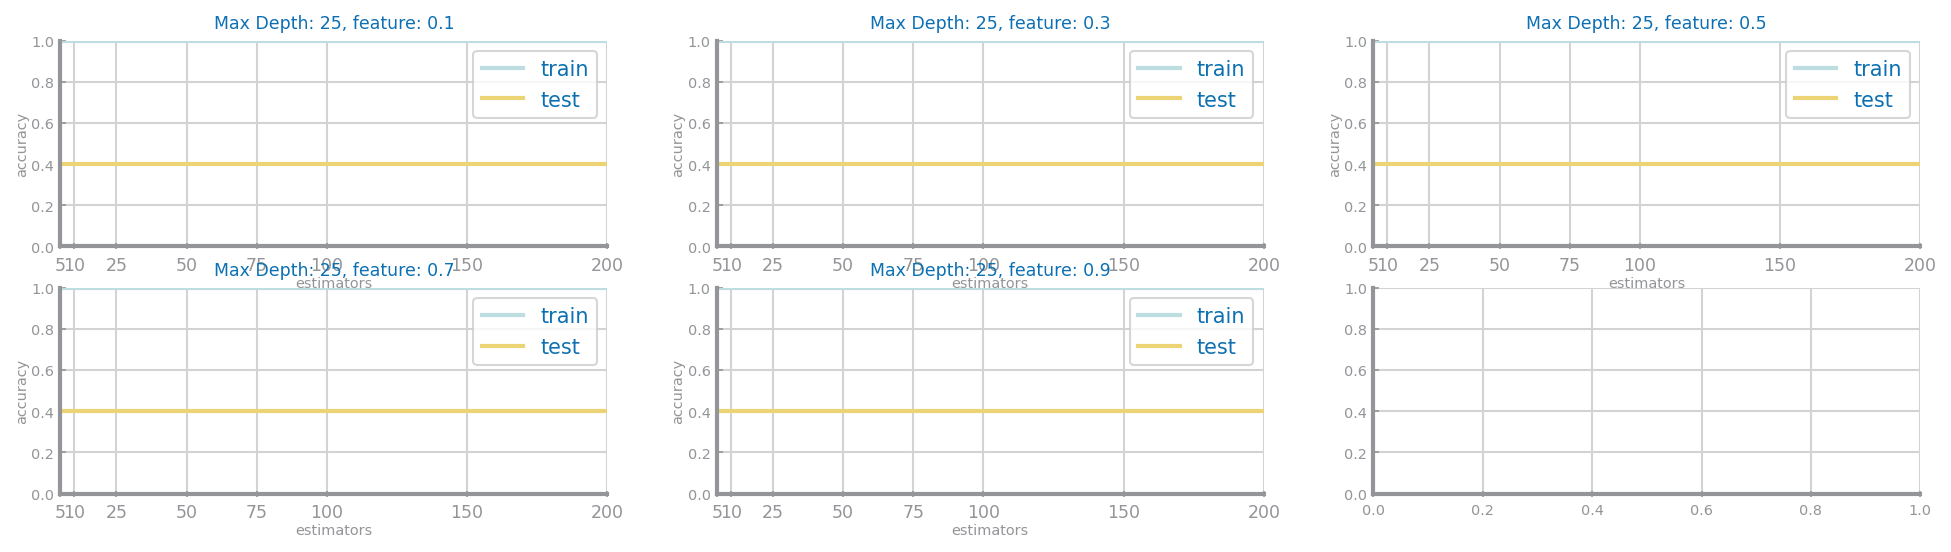

In [29]:
for j in range(len(max_depths)):
    train_values = max_depth_train_values[max_depths[j]]
    test_values = max_depth_test_values[max_depths[j]]
    plt.figure()
    fig, axs = plt.subplots(2, 3, figsize=(16, 4), squeeze=False)
    for i in range(len(learning_rate)):
        ds.multiple_line_chart(n_estimators, {'train': train_values[learning_rate[i]], 'test': test_values[learning_rate[i]]}, ax=axs[int(i/3), i%3], title='Max Depth: ' + str(max_depths[j]) + ', feature: ' + str(learning_rate[i]), xlabel='estimators', ylabel='accuracy', percentage=True)
    plt.show()